# 2-Sigma Rental Listings - EDA and Numeric Feature Engineering

Importing Packages

In [1]:
from __future__ import print_function

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
terrain = sns.color_palette(palette='terrain',n_colors=10)
plasma = sns.color_palette(palette='plasma',n_colors=10)
rainbow = sns.color_palette(palette='rainbow',n_colors=6)

%matplotlib inline

from bokeh.io import output_notebook
from bokeh.layouts import gridplot,row,column
from bokeh.plotting import figure,show
output_notebook()

pd.set_option("display.max_columns",999)
pd.set_option('precision',2)
pd.options.mode.chained_assignment = None

Loading BokehJS ...

Loading the training data

In [2]:
train_df = pd.read_json('train.json')
train_df.head().T

,10,10000,100004,100007,100013
bathrooms,1.5,1,1,1,1
bedrooms,3,2,1,1,4
building_id,53a5b119ba8f7b61d4e010512e0dfc85,c5c8a357cba207596b04d1afd1e4f130,c3ba40552e2120b0acfc3cb5730bb2aa,28d9ad350afeaab8027513a3e52ac8d5,0
created,2016-06-24 07:54:24,2016-06-12 12:19:27,2016-04-17 03:26:41,2016-04-18 02:22:02,2016-04-28 01:32:41
description,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,,"Top Top West Village location, beautiful Pre-w...",Building Amenities - Garage - Garden - fitness...,Beautifully renovated 3 bedroom flex 4 bedroom...
display_address,Metropolitan Avenue,Columbus Avenue,W 13 Street,East 49th Street,West 143rd Street
features,[],"[Doorman, Elevator, Fitness Center, Cats Allow...","[Laundry In Building, Dishwasher, Hardwood Flo...","[Hardwood Floors, No Fee]",[Pre-War]
interest_level,medium,low,high,low,low
latitude,41,41,41,41,41
listing_id,7211212,7150865,6887163,6888711,6934781


**Getting a high-level view of the data**

In [3]:
train_df.shape

(49352, 15)

In [4]:
train_df.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00,49352.00,49352.00,4.94e+04,49352.00,4.94e+04
mean,1.21,1.54,40.74,7.02e+06,-73.96,3.83e+03
std,0.50,1.12,0.64,1.26e+05,1.18,2.21e+04
min,0.00,0.00,0.00,6.81e+06,-118.27,4.30e+01
25%,1.00,1.00,40.73,6.92e+06,-73.99,2.50e+03
50%,1.00,1.00,40.75,7.02e+06,-73.98,3.15e+03
75%,1.00,2.00,40.77,7.13e+06,-73.95,4.10e+03
max,10.00,8.00,44.88,7.75e+06,0.00,4.49e+06


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 10 to 99994
Data columns (total 15 columns):
bathrooms          49352 non-null float64
bedrooms           49352 non-null int64
building_id        49352 non-null object
created            49352 non-null object
description        49352 non-null object
display_address    49352 non-null object
features           49352 non-null object
interest_level     49352 non-null object
latitude           49352 non-null float64
listing_id         49352 non-null int64
longitude          49352 non-null float64
manager_id         49352 non-null object
photos             49352 non-null object
price              49352 non-null int64
street_address     49352 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


**Exploring `interest_level` is the target feature**

In [6]:
int_level = train_df['interest_level'].value_counts()
int_level

low       34284
medium    11229
high       3839
Name: interest_level, dtype: int64

In [7]:
pct_low = int_level['low'] * 1.0 / train_df['interest_level'].count()
pct_med = int_level['medium'] * 1.0 / train_df['interest_level'].count()
pct_hi = int_level['high'] * 1.0 / train_df['interest_level'].count()

pct_low, pct_med, pct_hi

(0.69468309288377372, 0.22752877289674178, 0.077788134219484523)

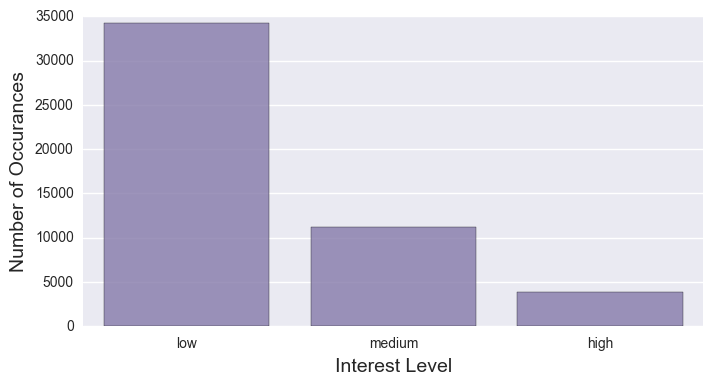

In [8]:
plt.figure(figsize=(8,4))
sns.barplot(int_level.index, int_level.values, alpha=0.8, color=color[3])
plt.ylabel('Number of Occurances', fontsize=14)
plt.xlabel('Interest Level', fontsize=14)
plt.show()

Interest level is `low` for almost 70% of the listings -- most listings are meh

**Numerical Feature Exploration**

- bedrooms
- bathrooms
- price
- geographical coordinates (latitude, longitude)


**`bedrooms`**

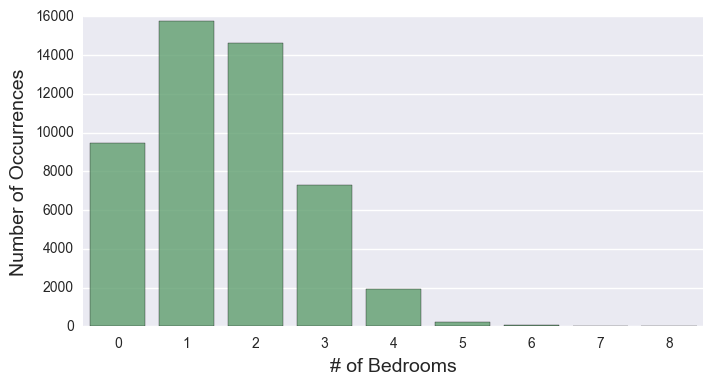

In [9]:
num_bedrooms = train_df['bedrooms'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(num_bedrooms.index, num_bedrooms.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=14)
plt.xlabel('# of Bedrooms', fontsize=14)
plt.show()

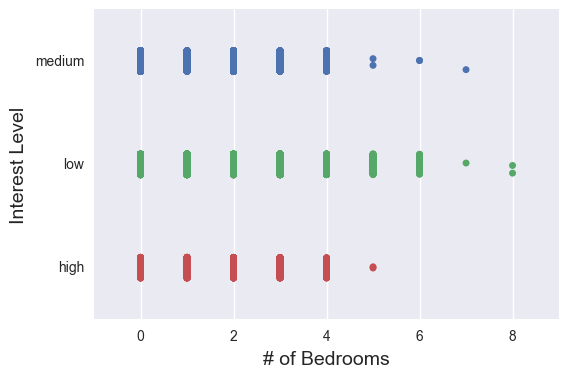

In [10]:
sns.stripplot(x="bedrooms", 
              y="interest_level", 
              data=train_df, 
              jitter=True)

plt.ylabel('Interest Level', fontsize=14)
plt.xlabel('# of Bedrooms', fontsize=14)
plt.show()

Interest level is fairly evenly distributed by number of bedrooms

**`bathrooms`**

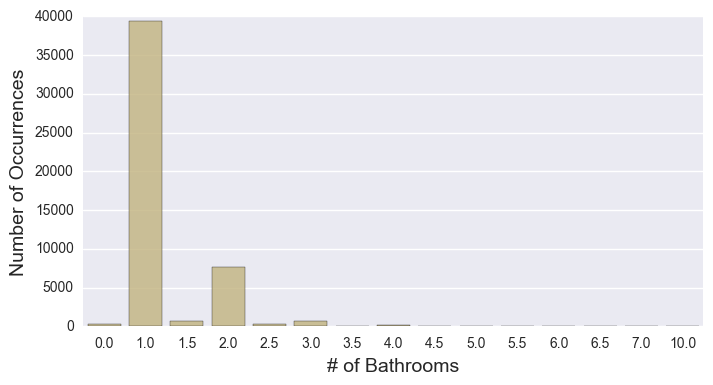

In [11]:
num_bathrooms = train_df['bathrooms'].value_counts()

plt.figure(figsize=(8,4))

sns.barplot(num_bathrooms.index, 
            num_bathrooms.values, 
            alpha=0.8, 
            color=color[4])

plt.ylabel('Number of Occurrences', fontsize=14)
plt.xlabel('# of Bathrooms', fontsize=14)
plt.show()

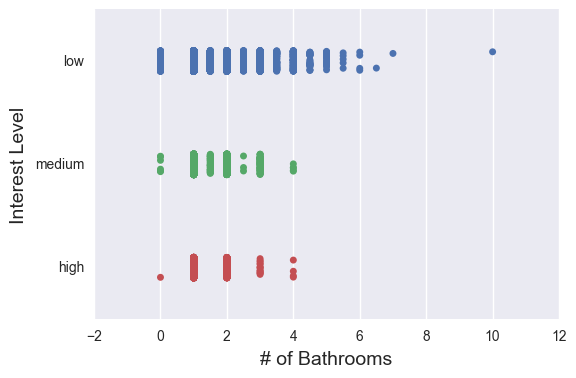

In [12]:
sns.stripplot(x="bathrooms", 
              y="interest_level", 
              data=train_df, 
              jitter=True, 
              order=['low', 'medium', 'high'])

plt.ylabel('Interest Level', fontsize=14)
plt.xlabel('# of Bathrooms', fontsize=14)
plt.show()

Similar to bedrooms, Interest level is fairly evenly distributed by number of bathrooms

**`price`**

In [13]:
train_df['price'].describe()

count    4.94e+04
mean     3.83e+03
std      2.21e+04
min      4.30e+01
25%      2.50e+03
50%      3.15e+03
75%      4.10e+03
max      4.49e+06
Name: price, dtype: float64

In [14]:
train_df['price'].max()

4490000

Have to adjust `price` (monthly rent) for outliers in order to get a meaningful visualization.

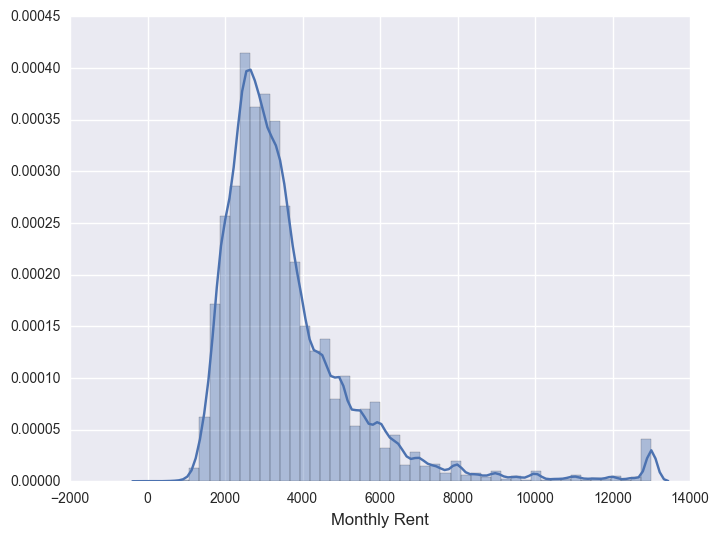

In [15]:
upper_limit = np.percentile(train_df['price'].values, 99)
train_df['price'].ix[train_df['price'] > upper_limit] = upper_limit

plt.figure(figsize=(8,6))
sns.distplot(train_df['price'].values, bins=50, kde=True)
plt.xlabel('Monthly Rent', fontsize=12)
plt.show()

Fairly long right tail on price distribution, skewing it to the right

### Mapping NYC by Monthly Rent - Strong Argument to Live in the Outer Boroughs

In [16]:
Lat25 = train_df['latitude'][train_df['price']<2500]
Long25 = train_df['longitude'][train_df['price']<2500]

Lat30 = train_df['latitude'][(train_df['price']<3000)&(train_df['price']>=2500)]
Long30 = train_df['longitude'][(train_df['price']<3000)&(train_df['price']>=2500)]

Lat35 = train_df['latitude'][(train_df['price']<3500)&(train_df['price']>=3000)]
Long35 = train_df['longitude'][(train_df['price']<3500)&(train_df['price']>=3000)]

Lat40 = train_df['latitude'][(train_df['price']<4000)&(train_df['price']>=3500)]
Long40 = train_df['longitude'][(train_df['price']<4000)&(train_df['price']>=3500)]

Latup = train_df['latitude'][(train_df['price']>=4000)]
Longup = train_df['longitude'][(train_df['price']>=4000)]

In [17]:
p = figure(title="Monthly Rent", y_range=(40.65,40.85), x_range=(-74.05,-73.85))
p.xaxis.axis_label = 'latitude'
p.yaxis.axis_label = 'longitude'

p.circle(Long25, Lat25, size=3, color=rainbow.as_hex()[0], fill_alpha=0.6, line_alpha=0.6, legend='<$2500')
p.circle(Long30, Lat30, size=3, color=rainbow.as_hex()[2], fill_alpha=0.6, line_alpha=0.6, legend='$3000')
p.circle(Long35, Lat35, size=3, color=rainbow.as_hex()[4], fill_alpha=0.6, line_alpha=0.6, legend='$3500')
p.circle(Long40, Lat40, size=3, color=rainbow.as_hex()[5], fill_alpha=0.6, line_alpha=0.6, legend='$4000')

p.legend.location = 'bottom_right'
show(p, notebook_handle=True)

### Interest Level Based on Geographical Location

In [18]:
p = figure(title="interest level based on geography",
           y_range=(40.65,40.85),
           x_range=(-74.05,-73.85))

p.xaxis.axis_label = 'longitude'
p.yaxis.axis_label = 'latitude'

lowLat = train_df['latitude'][train_df['interest_level']=='low']
lowLong = train_df['longitude'][train_df['interest_level']=='low']

medLat = train_df['latitude'][train_df['interest_level']=='medium']
medLong = train_df['longitude'][train_df['interest_level']=='medium']

highLat=train_df['latitude'][train_df['interest_level']=='high']
highLong=train_df['longitude'][train_df['interest_level']=='high']

p.circle(lowLong,lowLat,size=3,color=terrain.as_hex()[1],fill_alpha=0.1,line_alpha=0.1,legend='low')
p.circle(medLong,medLat,size=3,color=plasma.as_hex()[9],fill_alpha=0.1,line_alpha=0.1,legend='med')
p.circle(highLong,highLat,size=3,color=plasma.as_hex()[5],fill_alpha=0.1,line_alpha=0.1,legend='high')

show(p, notebook_handle=True)

### Mapping Listings by Interest Level

Lots of listings for the Upper East Side and Lower East Side

In [19]:
p1 = figure(width=500, height=500, title=None, y_range=(40.65,40.85), x_range=(-74.05,-73.85))
p1.circle(lowLong, lowLat, size=3, color=terrain.as_hex()[1], fill_alpha=0.1, line_alpha=0.1, legend='low')

p2 = figure(width=500, height=500, title=None, y_range=(40.65,40.85), x_range=(-74.05,-73.85))
p2.circle(medLong, medLat, size=3, color=plasma.as_hex()[9], fill_alpha=0.1, line_alpha=0.1, legend='med')

p3 = figure(width=500, height=500, title=None, y_range=(40.65,40.85), x_range=(-74.05,-73.85))
p3.circle(highLong, highLat, size=3, color=plasma.as_hex()[5], fill_alpha=0.1, line_alpha=0.1, legend='high')

show(column(p1,p2,p3), notebook_handle=True)


**`created`**

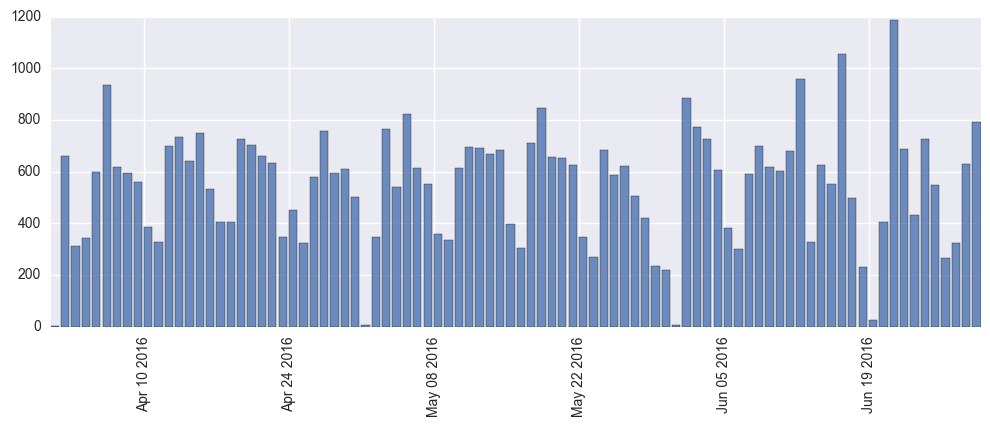

In [20]:
# converting `created` to a pandas datetime object

train_df['created'] = pd.to_datetime(train_df['created'])
train_df['date_created'] = train_df['created'].dt.date
d_created = train_df['date_created'].value_counts()

plt.figure(figsize=(12,4))
ax = plt.subplot(111)
ax.bar(d_created.index, d_created.values, alpha=0.8)
ax.xaxis_date()
plt.xticks(rotation='vertical')
plt.show()

Train listings created between April and end of June 2016

**`display_address`**

Listing Address that appear less than 2 times: 63.22%
Listing Address that appear less than 10 times: 89.6%
Listing Address that appear less than 50 times: 97.73%
Listing Address that appear less than 100 times: 99.26%
Listing Address that appear less than 500 times: 100.0%


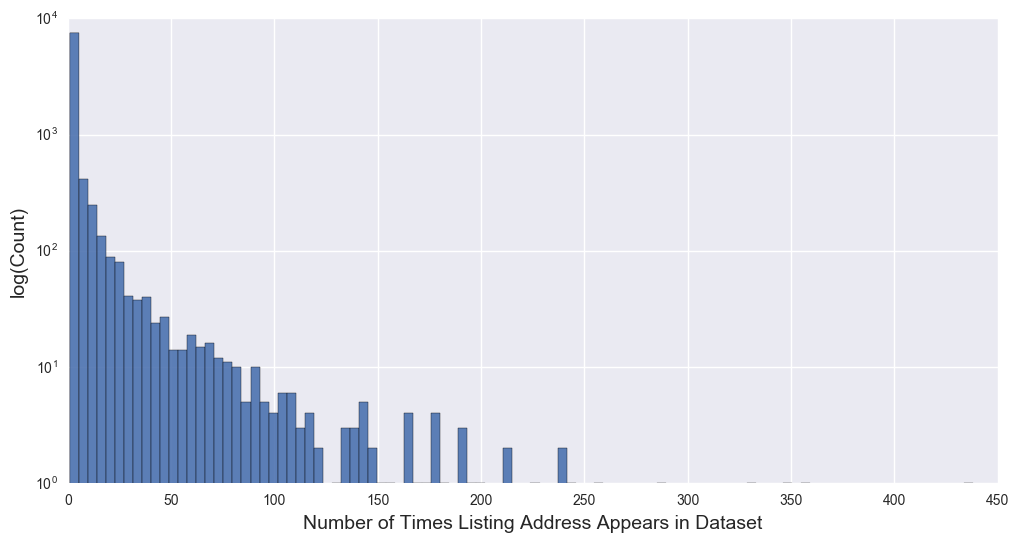

In [21]:
d_address = train_df.groupby('display_address')['display_address'].count()

for i in [2, 10, 50, 100, 500]:
    print('Listing Address that appear less than {} times: {}%'.format(i, round((d_address < i).mean() * 100, 2)))

plt.figure(figsize=(12, 6))
plt.hist(d_address.values, bins=100, log=True, alpha=0.9)
plt.xlabel('Number of Times Listing Address Appears in Dataset', fontsize=14)
plt.ylabel('log(Count)', fontsize=14)
plt.show()

In [22]:
d_address.mean(), d_address.median()

(5.591661001586223, 1.0)

**`photos` and `num_photos`**

The listing data is accompanied by a corresponding database of listing photos.  We can do some EDA on the number of number of photos per listing.

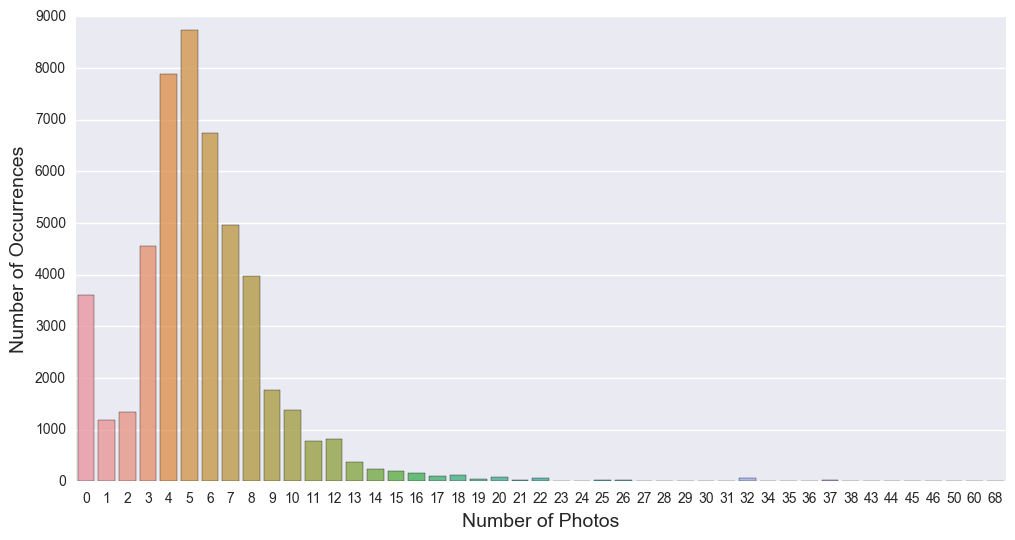

In [23]:
# creating new feature called num_photos which is the length of the photos column

train_df['num_photos'] = train_df['photos'].apply(len)

n_photos = train_df['num_photos'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(n_photos.index, n_photos.values, alpha=0.8)
plt.xlabel('Number of Photos', fontsize=14)
plt.ylabel('Number of Occurrences', fontsize=14)
plt.show()

Most listings were accompanied by 4-6 photos.  A suprisingly high number came without photos.  There were outliers with > 20 photos, which probably correspond to the outliers on price.

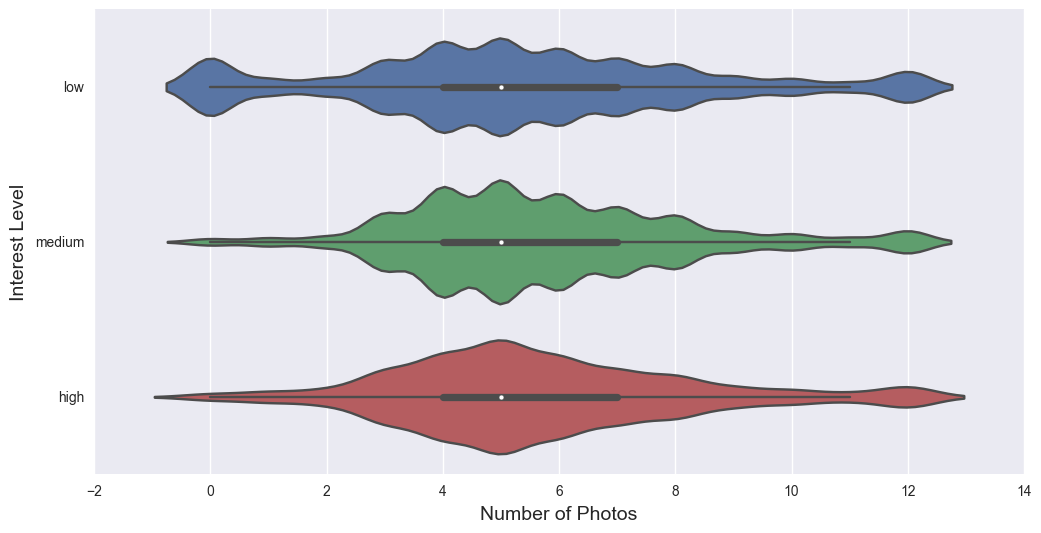

In [24]:
train_df['num_photos'].ix[train_df['num_photos'] > 12] = 12 # removing the photo outliers

plt.figure(figsize=(12,6))

sns.violinplot(x="num_photos", 
               y="interest_level", 
               data=train_df, 
               order=['low','medium','high'])

plt.xlabel('Number of Photos', fontsize=14)
plt.ylabel('Interest Level', fontsize=14)
plt.show()

From the left bulge in the `low` violin plot, it looks like not having a photo is a factor in those listings having low interest.

## Naive Feature Engineering on the Text Data

**`features` and `num_features`**

- this feature is a list of amenities like doorman, laundry, etc.

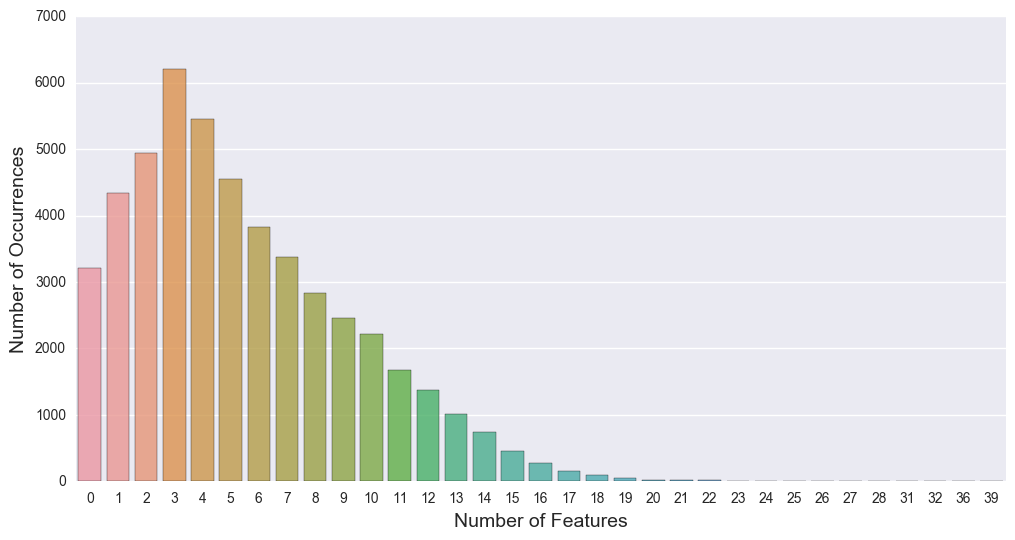

In [25]:
# creating new feature called num_features which is the length of the list in features column

train_df['num_features'] = train_df['features'].apply(len)

n_features = train_df['num_features'].value_counts()

plt.figure(figsize=(12,6))

sns.barplot(n_features.index, 
            n_features.values, 
            alpha=0.8)

plt.ylabel('Number of Occurrences', fontsize=14)
plt.xlabel('Number of Features', fontsize=14)
plt.show()

In [26]:
train_df['num_features'].describe()

count    49352.00
mean         5.43
std          3.92
min          0.00
25%          2.00
50%          5.00
75%          8.00
max         39.00
Name: num_features, dtype: float64

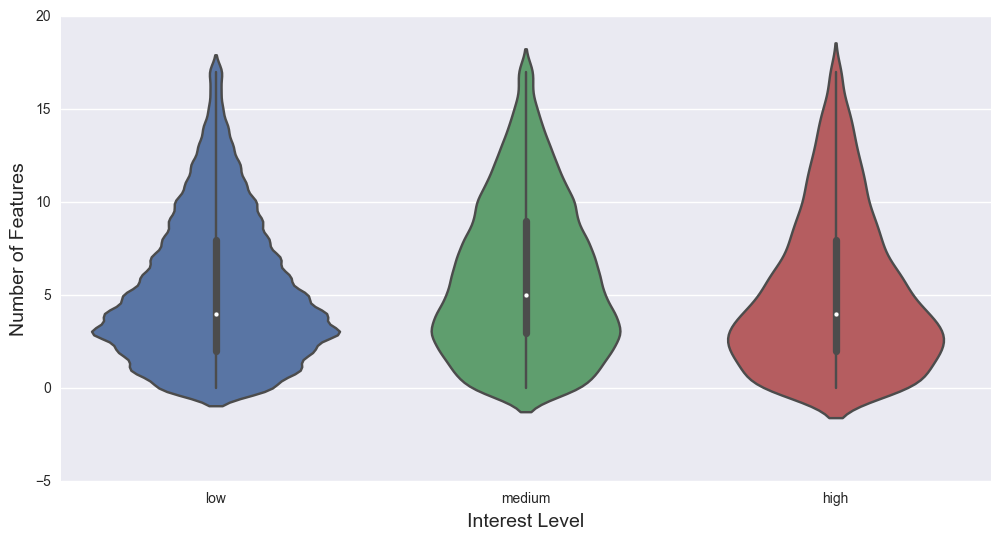

In [27]:
train_df['num_features'].ix[train_df['num_features']>17] = 17

plt.figure(figsize=(12,6))

sns.violinplot(x="interest_level",
               y="num_features", 
               data=train_df, 
               order=['low','medium','high'])

plt.xlabel('Interest Level', fontsize=14)
plt.ylabel('Number of Features', fontsize=14)
plt.show()


**`description` and `description_length`**

In [28]:
train_df["description_length"] = train_df["description"].apply(lambda x: len(x.split(" ")))
train_df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address,date_created,num_photos,num_features,description_length
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.71,7211212,-73.94,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000.0,792 Metropolitan Avenue,2016-06-24,5,0,95
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.79,7150865,-73.97,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465.0,808 Columbus Avenue,2016-06-12,11,5,9
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.74,6887163,-74.00,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850.0,241 W 13 Street,2016-04-17,8,4,94
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.75,6888711,-73.97,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275.0,333 East 49th Street,2016-04-18,3,2,80
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.82,6934781,-73.95,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350.0,500 West 143rd Street,2016-04-28,3,1,68


In [29]:
train_df['description_length'].describe()

count    49352.00
mean        90.14
std         59.39
min          1.00
25%         50.00
50%         83.00
75%        120.00
max        667.00
Name: description_length, dtype: float64

In [30]:
train_df['description_length'].sum()

4448504

In [31]:
# of unique words in the description

train_df['description_length'].unique().sum()

90064

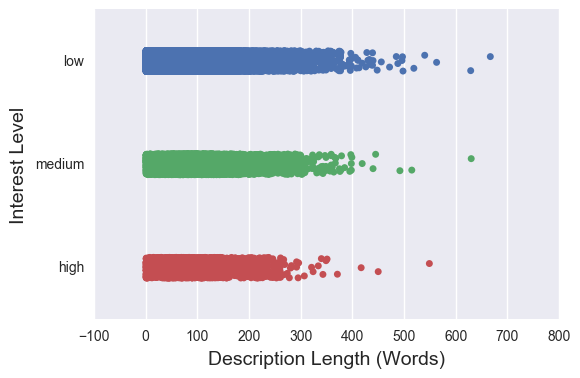

In [32]:
sns.stripplot(x="description_length", 
              y="interest_level", 
              data=train_df, 
              jitter=True, 
              order=['low', 'medium', 'high'])

plt.ylabel('Interest Level', fontsize=14)
plt.xlabel('Description Length (Words)', fontsize=14)
plt.show()

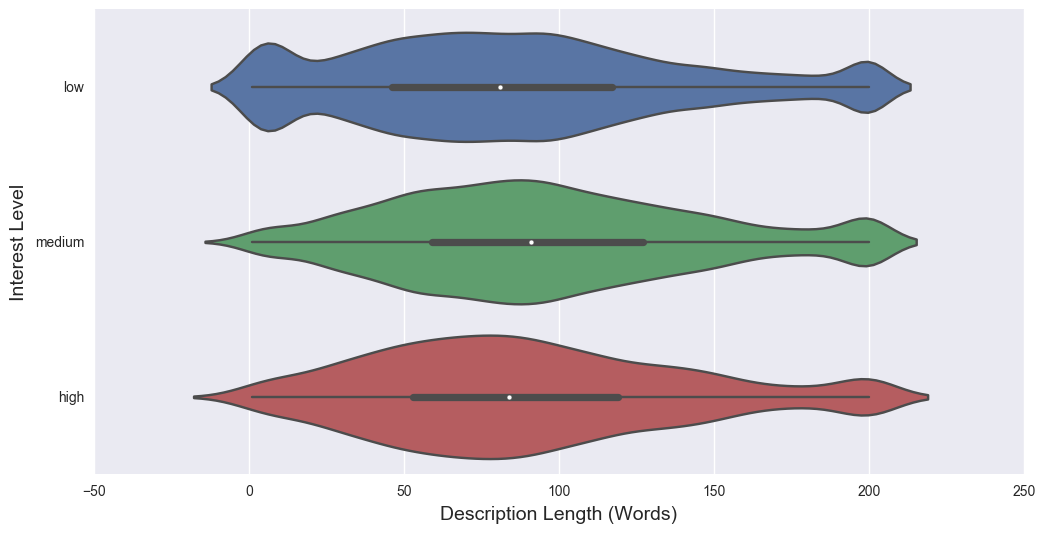

In [33]:
train_df['description_length'].ix[train_df['description_length'] > 200] = 200 # removing the photo outliers

plt.figure(figsize=(12,6))

sns.violinplot(x="description_length", 
               y="interest_level", 
               data=train_df, 
               order=['low','medium','high'])

plt.xlabel('Description Length (Words)', fontsize=14)
plt.ylabel('Interest Level', fontsize=14)
plt.show()

## Looking at the Unique Values for the Categorical Features

In [34]:
train_df.shape

(49352, 19)

In [35]:
train_df['display_address'].nunique(), train_df['street_address'].nunique()

(8826, 15358)

In [36]:
train_df['building_id'].nunique(), train_df['manager_id'].nunique()

(7585, 3481)

## Taking a Closer Look at `manager_id`

Lots of unique managers in absolute tems, but there could be a link between 'good' managers and 'high' interest

In [37]:
managers_df = train_df.groupby('manager_id').count().iloc[:,-1]
managers_df.head(10)

manager_id
0000abd7518b94c35a90d64b56fbf3e6    12
001ce808ce1720e24a9510e014c69707    10
003fc4e9a70053082f131b1054966aaf     1
00607a02f6efd9c6c7c588826e471ee9     2
00995ff28d79127ed2dca8320e9e7d09     3
00a8d77892cab18fffaa22a751f1f8eb     3
00f0b3346ba8379b26b95be8a19d46b1     1
00f526d80353a50a52bbc26919e7ed5a     1
01074bb974b125b65fa1b11a64c65135     3
01157144534c928d731696e57ae4cd09    13
Name: description_length, dtype: int64

In [38]:
# sorting the manager_id by number of listings - some managers account for a large percentage of listings

managers_count_df = managers_df.sort_values(ascending=False)
managers_count_df.head(10)

manager_id
e6472c7237327dd3903b3d6f6a94515a    2533
6e5c10246156ae5bdcd9b487ca99d96a     711
8f5a9c893f6d602f4953fcc0b8e6e9b4     410
62b685cc0d876c3a1a51d63a0d6a8082     402
cb87dadbca78fad02b388dc9e8f25a5b     373
9df32cb8dda19d3222d66e69e258616b     330
b7de4cb395920136663132057fa89d84     320
2aa9bfa5f67ed9997ea341dee8a3a271     316
ad3d8ddc52c7e0859b5c6c7f7949c3bd     305
c9c33695ee2a2f818e9f1d8f7d1c4b39     299
Name: description_length, dtype: int64

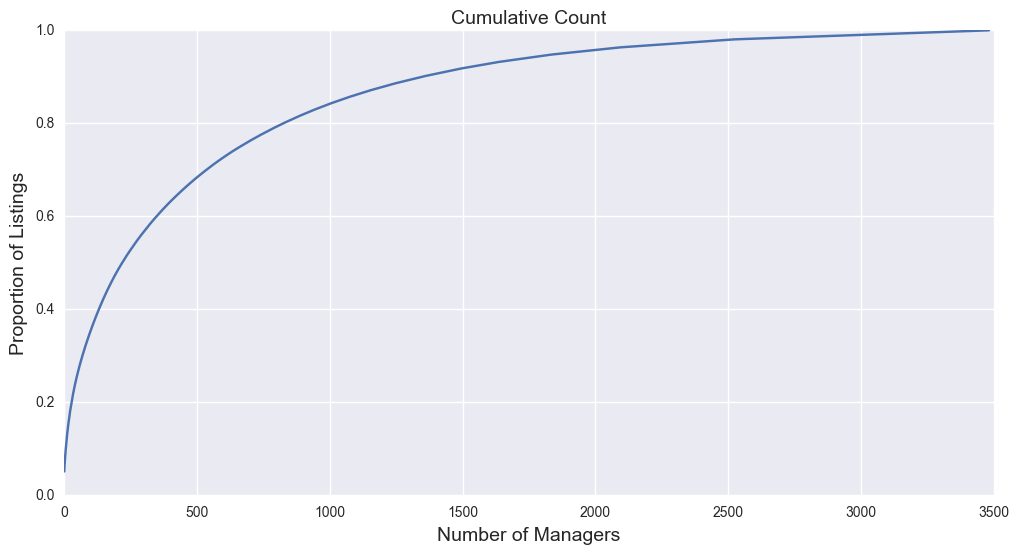

In [39]:
chart_data = managers_df.dropna().sort_values(ascending=False).reset_index(drop=True)

plt.figure(figsize=(12,6))
plt.plot(chart_data.index + 1, chart_data.cumsum() / chart_data.sum())
plt.xlabel('Number of Managers', fontsize=14)
plt.ylabel('Proportion of Listings', fontsize=14)
plt.title('Cumulative Count', fontsize=14)

Managers with large number of listings may be an important variable as the chart shows that 1/3 of the managers account for more than 80% of total listings

In [40]:
type(managers_df), managers_df.shape

(pandas.core.series.Series, (3481,))

In [41]:
managers_df.shape, train_df.shape

((3481,), (49352, 19))

In [42]:
managers_df.head()

manager_id
0000abd7518b94c35a90d64b56fbf3e6    12
001ce808ce1720e24a9510e014c69707    10
003fc4e9a70053082f131b1054966aaf     1
00607a02f6efd9c6c7c588826e471ee9     2
00995ff28d79127ed2dca8320e9e7d09     3
Name: description_length, dtype: int64

In [43]:
managers_df = managers_df.to_frame().reset_index()

In [44]:
managers_df.head()

,manager_id,description_length
0,0000abd7518b94c35a90d64b56fbf3e6,12
1,001ce808ce1720e24a9510e014c69707,10
2,003fc4e9a70053082f131b1054966aaf,1
3,00607a02f6efd9c6c7c588826e471ee9,2
4,00995ff28d79127ed2dca8320e9e7d09,3


In [45]:
managers_df.shape

(3481, 2)

In [46]:
managers_df.columns = ['manager_id', 'mgr_listing_count']

In [47]:
managers_df.head()

,manager_id,mgr_listing_count
0,0000abd7518b94c35a90d64b56fbf3e6,12
1,001ce808ce1720e24a9510e014c69707,10
2,003fc4e9a70053082f131b1054966aaf,1
3,00607a02f6efd9c6c7c588826e471ee9,2
4,00995ff28d79127ed2dca8320e9e7d09,3


In [48]:
managers_cum_pct = managers_df['mgr_listing_count'].sort_values(ascending=False).head(100)

managers_cum_pct = pd.concat([managers_cum_pct, managers_cum_pct.cumsum() / managers_df['mgr_listing_count'].sum()*100], axis=1).reset_index()
managers_cum_pct.columns = ['manager_id','mgr_listing_count','cum_percentage']

print(managers_cum_pct)

    manager_id  mgr_listing_count  cum_percentage
0         3135               2533            5.13
1         1499                711            6.57
2         1954                410            7.40
3         1338                402            8.22
4         2784                373            8.97
5         2145                330            9.64
6         2533                320           10.29
7          607                316           10.93
8         2373                305           11.55
9         2764                299           12.16
10         457                289           12.74
11        2887                276           13.30
12        1159                256           13.82
13        2338                246           14.32
14        1337                233           14.79
15        1903                222           15.24
16        1316                214           15.67
17        3003                212           16.10
18        2443                210           16.53


## Feature Engineering on `manager_id` - Binning Based on Number of Listings per Manager

In [49]:
train_df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address,date_created,num_photos,num_features,description_length
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.71,7211212,-73.94,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000.0,792 Metropolitan Avenue,2016-06-24,5,0,95
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.79,7150865,-73.97,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465.0,808 Columbus Avenue,2016-06-12,11,5,9
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.74,6887163,-74.00,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850.0,241 W 13 Street,2016-04-17,8,4,94
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.75,6888711,-73.97,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275.0,333 East 49th Street,2016-04-18,3,2,80
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.82,6934781,-73.95,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350.0,500 West 143rd Street,2016-04-28,3,1,68


In [50]:
train_df.set_index('listing_id', inplace=True)

In [51]:
train_df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,longitude,manager_id,photos,price,street_address,date_created,num_photos,num_features,description_length
listing_id,,,,,,,,,,,,,,,,,,
7211212,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.71,-73.94,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000.0,792 Metropolitan Avenue,2016-06-24,5,0,95
7150865,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.79,-73.97,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465.0,808 Columbus Avenue,2016-06-12,11,5,9
6887163,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.74,-74.00,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850.0,241 W 13 Street,2016-04-17,8,4,94
6888711,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.75,-73.97,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275.0,333 East 49th Street,2016-04-18,3,2,80
6934781,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.82,-73.95,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350.0,500 West 143rd Street,2016-04-28,3,1,68


In [52]:
train_df.shape

(49352, 18)

In [53]:
train_df = pd.merge(train_df, managers_df, on='manager_id', how='inner')

In [54]:
train_df.shape

(49352, 19)

In [55]:
train_df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,longitude,manager_id,photos,price,street_address,date_created,num_photos,num_features,description_length,mgr_listing_count
0,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.71,-73.94,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000.0,792 Metropolitan Avenue,2016-06-24,5,0,95,90
1,1.0,1,0,2016-04-18 03:31:04,GUT Renovated Greenpoint 1 bedroom with brand ...,Meeker Avenue,[New Construction],low,40.72,-73.94,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/6890059_a3109b80...,2250.0,585 Meeker Avenue,2016-04-18,5,1,63,90
2,1.0,1,0,2016-04-11 03:02:33,This is a spacious open floor plan with 1 BEDR...,Washington Avenue,"[Elevator, Laundry in Building]",low,40.69,-73.97,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/6855492_ee159bf8...,2200.0,266 Washington Avenue,2016-04-11,5,2,105,90
3,1.0,1,0,2016-04-02 03:09:43,Small building of just 8 apartments!<br /><br ...,Himrod Street,[],medium,40.70,-73.92,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/6814785_e611ba1d...,1950.0,93 Himrod Street,2016-04-02,4,0,29,90
4,1.0,1,0,2016-04-28 05:49:14,Renovated 1 Bedroom with Southern Exposure<br ...,Wyckoff Avenue,[],low,40.71,-73.92,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/6938079_6c16a41a...,2000.0,71 Wyckoff Avenue,2016-04-28,4,0,27,90


Binning number of managers

In [56]:
def manager_size(row):
    manager_bin = row['mgr_listing_count']
    if manager_bin < 50:
        return 1
    elif manager_bin < 100:
        return 2
    elif manager_bin < 150:
        return 3
    elif manager_bin < 200:
        return 4
    else:
        return 5

In [57]:
manager_bin_labels = train_df.apply(manager_size, axis=1)
train_df['manager_bin_size'] = manager_bin_labels
train_df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,longitude,manager_id,photos,price,street_address,date_created,num_photos,num_features,description_length,mgr_listing_count,manager_bin_size
0,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.71,-73.94,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000.0,792 Metropolitan Avenue,2016-06-24,5,0,95,90,2
1,1.0,1,0,2016-04-18 03:31:04,GUT Renovated Greenpoint 1 bedroom with brand ...,Meeker Avenue,[New Construction],low,40.72,-73.94,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/6890059_a3109b80...,2250.0,585 Meeker Avenue,2016-04-18,5,1,63,90,2
2,1.0,1,0,2016-04-11 03:02:33,This is a spacious open floor plan with 1 BEDR...,Washington Avenue,"[Elevator, Laundry in Building]",low,40.69,-73.97,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/6855492_ee159bf8...,2200.0,266 Washington Avenue,2016-04-11,5,2,105,90,2
3,1.0,1,0,2016-04-02 03:09:43,Small building of just 8 apartments!<br /><br ...,Himrod Street,[],medium,40.70,-73.92,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/6814785_e611ba1d...,1950.0,93 Himrod Street,2016-04-02,4,0,29,90,2
4,1.0,1,0,2016-04-28 05:49:14,Renovated 1 Bedroom with Southern Exposure<br ...,Wyckoff Avenue,[],low,40.71,-73.92,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/6938079_6c16a41a...,2000.0,71 Wyckoff Avenue,2016-04-28,4,0,27,90,2


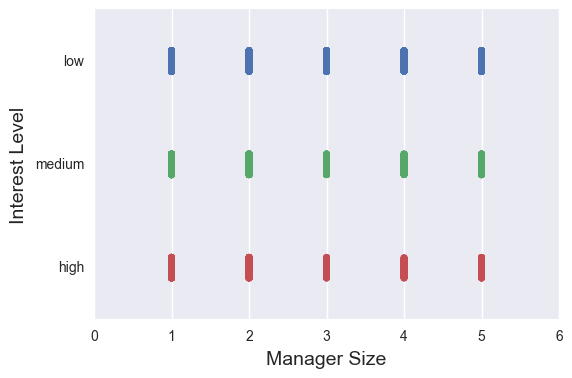

In [58]:
sns.stripplot(x="manager_bin_size", 
              y="interest_level", 
              data=train_df, 
              jitter=True, 
              order=['low', 'medium', 'high'])

plt.ylabel('Interest Level', fontsize=14)
plt.xlabel('Manager Size', fontsize=14)
plt.show()

Larger managers are not necessarily better - interest levels fairly evenly split between manager size bins

## Naive Feature Engineering on `created` pandas `datetime` object

In [59]:
train_df['created_month'] = train_df['created'].dt.month
train_df['created_day'] = train_df['created'].dt.day
train_df["created_hour"] = train_df["created"].dt.hour

In [60]:
train_df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,longitude,manager_id,photos,price,street_address,date_created,num_photos,num_features,description_length,mgr_listing_count,manager_bin_size,created_month,created_day,created_hour
0,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.71,-73.94,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000.0,792 Metropolitan Avenue,2016-06-24,5,0,95,90,2,6,24,7
1,1.0,1,0,2016-04-18 03:31:04,GUT Renovated Greenpoint 1 bedroom with brand ...,Meeker Avenue,[New Construction],low,40.72,-73.94,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/6890059_a3109b80...,2250.0,585 Meeker Avenue,2016-04-18,5,1,63,90,2,4,18,3
2,1.0,1,0,2016-04-11 03:02:33,This is a spacious open floor plan with 1 BEDR...,Washington Avenue,"[Elevator, Laundry in Building]",low,40.69,-73.97,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/6855492_ee159bf8...,2200.0,266 Washington Avenue,2016-04-11,5,2,105,90,2,4,11,3
3,1.0,1,0,2016-04-02 03:09:43,Small building of just 8 apartments!<br /><br ...,Himrod Street,[],medium,40.70,-73.92,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/6814785_e611ba1d...,1950.0,93 Himrod Street,2016-04-02,4,0,29,90,2,4,2,3
4,1.0,1,0,2016-04-28 05:49:14,Renovated 1 Bedroom with Southern Exposure<br ...,Wyckoff Avenue,[],low,40.71,-73.92,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/6938079_6c16a41a...,2000.0,71 Wyckoff Avenue,2016-04-28,4,0,27,90,2,4,28,5


## Binning Portion of Month Listing Created

Does urgency to find a place before their current lease run out influence interest level

In [61]:
def time_of_month(row):
    time_bin = row['created_day']
    if time_bin < 11:
        return 1
    elif time_bin < 21:
        return 2
    else:
        return 3

In [62]:
time_bin_labels = train_df.apply(time_of_month, axis=1)
train_df['time_of_month_bin'] = time_bin_labels
train_df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,longitude,manager_id,photos,price,street_address,date_created,num_photos,num_features,description_length,mgr_listing_count,manager_bin_size,created_month,created_day,created_hour,time_of_month_bin
0,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.71,-73.94,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000.0,792 Metropolitan Avenue,2016-06-24,5,0,95,90,2,6,24,7,3
1,1.0,1,0,2016-04-18 03:31:04,GUT Renovated Greenpoint 1 bedroom with brand ...,Meeker Avenue,[New Construction],low,40.72,-73.94,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/6890059_a3109b80...,2250.0,585 Meeker Avenue,2016-04-18,5,1,63,90,2,4,18,3,2
2,1.0,1,0,2016-04-11 03:02:33,This is a spacious open floor plan with 1 BEDR...,Washington Avenue,"[Elevator, Laundry in Building]",low,40.69,-73.97,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/6855492_ee159bf8...,2200.0,266 Washington Avenue,2016-04-11,5,2,105,90,2,4,11,3,2
3,1.0,1,0,2016-04-02 03:09:43,Small building of just 8 apartments!<br /><br ...,Himrod Street,[],medium,40.70,-73.92,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/6814785_e611ba1d...,1950.0,93 Himrod Street,2016-04-02,4,0,29,90,2,4,2,3,1
4,1.0,1,0,2016-04-28 05:49:14,Renovated 1 Bedroom with Southern Exposure<br ...,Wyckoff Avenue,[],low,40.71,-73.92,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/6938079_6c16a41a...,2000.0,71 Wyckoff Avenue,2016-04-28,4,0,27,90,2,4,28,5,3


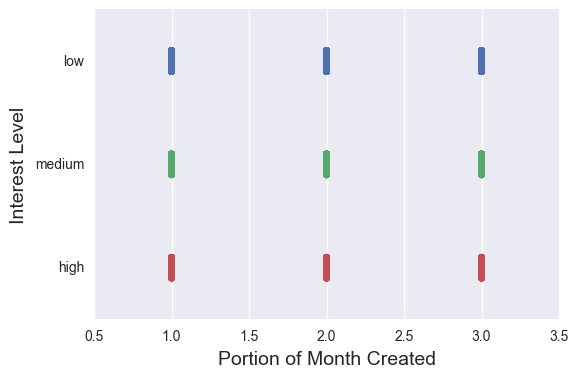

In [63]:
sns.stripplot(x="time_of_month_bin", 
              y="interest_level", 
              data=train_df, 
              jitter=True, 
              order=['low', 'medium', 'high'])

plt.ylabel('Interest Level', fontsize=14)
plt.xlabel('Portion of Month Created', fontsize=14)
plt.show()

Hypothesis that time of listing has an impact on interest level does not seem to valid -- newly posted listings that correspond to the end of the month have same mix of interest levels as listings created during the beginning and middle portions of the month

# Setting Up y

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [65]:
y = train_df["interest_level"].astype("category")
y.head()

0    medium
1       low
2       low
3    medium
4       low
Name: interest_level, dtype: category
Categories (3, object): [high, low, medium]

In [66]:
y.shape

(49352,)

In [67]:
le = LabelEncoder()

y = le.fit_transform(y)

In [68]:
y, y.shape

(array([2, 1, 1, ..., 2, 1, 2]), (49352,))

In [69]:
pd.Series(data=y).head()

0    2
1    1
2    1
3    2
4    1
dtype: int64

**Coding: 2 = 'medium', 1 = 'low', 0 = 'high'**

## Dummies on Certain X Variables

Going to use `get_dummies` to create dummy variables from `manager_bin_size` and `time_of_month_bin`

In [70]:
train_df["manager_bin_str"] = train_df["manager_bin_size"].astype(str)

In [71]:
train_df["month_bin_str"] = train_df["time_of_month_bin"].astype(str)

In [72]:
train_df.head(2)

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,longitude,manager_id,photos,price,street_address,date_created,num_photos,num_features,description_length,mgr_listing_count,manager_bin_size,created_month,created_day,created_hour,time_of_month_bin,manager_bin_str,month_bin_str
0,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.71,-73.94,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000.0,792 Metropolitan Avenue,2016-06-24,5,0,95,90,2,6,24,7,3,2,3
1,1.0,1,0,2016-04-18 03:31:04,GUT Renovated Greenpoint 1 bedroom with brand ...,Meeker Avenue,[New Construction],low,40.72,-73.94,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/6890059_a3109b80...,2250.0,585 Meeker Avenue,2016-04-18,5,1,63,90,2,4,18,3,2,2,2


### Using `get_dummies`

#### `manager` dummies

In [73]:
manager_dummies_df = pd.get_dummies(train_df['manager_bin_str'], prefix='manager_bin') 
manager_dummies_df.head()

,manager_bin_1,manager_bin_2,manager_bin_3,manager_bin_4,manager_bin_5
0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0


In [74]:
manager_dummies_df.shape

(49352, 5)

In [75]:
manager_dummies_df['manager_bin_1'].describe()

count    49352.00
mean         0.52
std          0.50
min          0.00
25%          0.00
50%          1.00
75%          1.00
max          1.00
Name: manager_bin_1, dtype: float64

In [76]:
month_dummies_df = pd.get_dummies(train_df['month_bin_str'], prefix='month_bin') 
month_dummies_df.head()

,month_bin_1,month_bin_2,month_bin_3
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0


In [77]:
month_dummies_df.shape

(49352, 3)

In [78]:
month_dummies_df['month_bin_1'].describe()

count    49352.00
mean         0.33
std          0.47
min          0.00
25%          0.00
50%          0.00
75%          1.00
max          1.00
Name: month_bin_1, dtype: float64

## Constructing `X_num`

In [79]:
train_df.columns.tolist()

[u'bathrooms',
 u'bedrooms',
 u'building_id',
 u'created',
 u'description',
 u'display_address',
 u'features',
 u'interest_level',
 u'latitude',
 u'longitude',
 u'manager_id',
 u'photos',
 u'price',
 u'street_address',
 'date_created',
 'num_photos',
 'num_features',
 'description_length',
 'mgr_listing_count',
 'manager_bin_size',
 'created_month',
 'created_day',
 'created_hour',
 'time_of_month_bin',
 'manager_bin_str',
 'month_bin_str']

In [80]:
numeric_features = ['bathrooms',
                    'bedrooms',
                    'price',
                    'num_photos',
                    'num_features',
                    'description_length'
                   ]

In [81]:
numeric_df = train_df[numeric_features]
numeric_df.head()

,bathrooms,bedrooms,price,num_photos,num_features,description_length
0,1.5,3,3000.0,5,0,95
1,1.0,1,2250.0,5,1,63
2,1.0,1,2200.0,5,2,105
3,1.0,1,1950.0,4,0,29
4,1.0,1,2000.0,4,0,27


In [82]:
numeric_df.shape

(49352, 6)

In [83]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 0 to 49351
Data columns (total 6 columns):
bathrooms             49352 non-null float64
bedrooms              49352 non-null int64
price                 49352 non-null float64
num_photos            49352 non-null int64
num_features          49352 non-null int64
description_length    49352 non-null int64
dtypes: float64(2), int64(4)
memory usage: 2.6 MB


### Geo Coordinates Features to Create `X_num`

In [84]:
geo_df = train_df[['latitude', 'longitude']]
geo_df.head(2)

,latitude,longitude
0,40.71,-73.94
1,40.72,-73.94


In [85]:
geo_df.shape

(49352, 2)

### Merging Numeric Features to Create `X_num`

In [86]:
# merging using pd.concat

X_num = pd.concat([numeric_df, geo_df, manager_dummies_df, month_dummies_df], axis=1)
X_num.head(2)

,bathrooms,bedrooms,price,num_photos,num_features,description_length,latitude,longitude,manager_bin_1,manager_bin_2,manager_bin_3,manager_bin_4,manager_bin_5,month_bin_1,month_bin_2,month_bin_3
0,1.5,3,3000.0,5,0,95,40.71,-73.94,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1,2250.0,5,1,63,40.72,-73.94,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [87]:
X_num.shape

(49352, 16)

## Pickling `X_num` and `y`

In [88]:
# X_num.to_pickle('X_num.pickle')

In [89]:
y.shape

(49352,)

In [90]:
# np.save('y', y)